In [1]:
import pandas as pd
import csv
import numpy as np
from numpy import array
from scipy.sparse import csr_matrix
from ast import literal_eval
from collections import Counter
from scipy import sparse
import glob
from scipy.sparse import vstack
from scipy.sparse import hstack
import gc
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
import random
import seaborn#.apionly
import scipy.stats as sp

# settings

In [2]:
# length of each event
EndIntro = 17
EndEvent1 = 23
EndEvent2 = 34
EndEvent3 = 50
EndEvent4 = 66

In [3]:
# set input and output directory
input_dir = '/Volumes/norman/scollin/schema/data/bids/Norman/Silvy/schema/derivatives/rsa/'
output_dir = '/Volumes/norman/scollin/schema/data/bids/Norman/Silvy/schema/derivatives/rsa/SFNfigures/'

In [4]:
# set ROI name to select which data to use
ROI_name = 'schema_pVals_thresh_fdr0.05_inverted'
# ROI_name = 'perception_pVals_thresh_fdr0.05_inverted'
# ROI_name = 'rotated_pVals_thresh_fdr0.05_inverted'
# ROI_name = 'REVISEDpath_pVals_thresh_fdr0.05_inverted'

# make variables for plotting

In [5]:
sameEv_otherSchema_group_e2templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_otherSchema_norm_event2Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_otherSchema_group_e2templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_otherSchema_norm_event2Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_sameSchema_group_e2templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_sameSchema_norm_event2Templates.csv').drop(['Unnamed: 0'], axis=1)
sameEv_sameSchema_group_e2templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_sameSchema_norm_event2Templates.csv').drop(['Unnamed: 0'], axis=1)

sameEv_otherSchema_group_e3templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_otherSchema_norm_event3Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_otherSchema_group_e3templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_otherSchema_norm_event3Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_sameSchema_group_e3templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_sameSchema_norm_event3Templates.csv').drop(['Unnamed: 0'], axis=1)
sameEv_sameSchema_group_e3templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_sameSchema_norm_event3Templates.csv').drop(['Unnamed: 0'], axis=1)

sameEv_otherSchema_group_e4templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_otherSchema_norm_event4Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_otherSchema_group_e4templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_otherSchema_norm_event4Templates.csv').drop(['Unnamed: 0'], axis=1)
otherEv_sameSchema_group_e4templ = pd.read_csv(input_dir + ROI_name + '_rsa_otherEv_sameSchema_norm_event4Templates.csv').drop(['Unnamed: 0'], axis=1)
sameEv_sameSchema_group_e4templ = pd.read_csv(input_dir + ROI_name + '_rsa_sameEv_sameSchema_norm_event4Templates.csv').drop(['Unnamed: 0'], axis=1)


## event 2 template

In [6]:
# sameSame = within event, within schema
# sameOther = within event, across schema
# otherOther = across event, across schema
# otherSame = across event, within schema

In [7]:
sameSameMean_e2templ_e2 = sameEv_sameSchema_group_e2templ.iloc[:,EndEvent1:EndEvent2]
sameSameMean_e2templ_e3 = sameEv_sameSchema_group_e2templ.iloc[:,EndEvent2:EndEvent3] 
sameSameMean_e2templ_e4 = sameEv_sameSchema_group_e2templ.iloc[:,EndEvent3:EndEvent4] 

sameOtherMean_e2templ_e2 = sameEv_otherSchema_group_e2templ.iloc[:,EndEvent1:EndEvent2] 
sameOtherMean_e2templ_e3 = sameEv_otherSchema_group_e2templ.iloc[:,EndEvent2:EndEvent3]
sameOtherMean_e2templ_e4 = sameEv_otherSchema_group_e2templ.iloc[:,EndEvent3:EndEvent4] 

otherOtherMean_e2templ_e2 = otherEv_otherSchema_group_e2templ.iloc[:,EndEvent1:EndEvent2]
otherOtherMean_e2templ_e3 = otherEv_otherSchema_group_e2templ.iloc[:,EndEvent2:EndEvent3]
otherOtherMean_e2templ_e4 = otherEv_otherSchema_group_e2templ.iloc[:,EndEvent3:EndEvent4] 

otherSameMean_e2templ_e2 = otherEv_sameSchema_group_e2templ.iloc[:,EndEvent1:EndEvent2]
otherSameMean_e2templ_e3 = otherEv_sameSchema_group_e2templ.iloc[:,EndEvent2:EndEvent3]
otherSameMean_e2templ_e4 = otherEv_sameSchema_group_e2templ.iloc[:,EndEvent3:EndEvent4]


## event 3 template

In [8]:
sameSameMean_e3templ_e2 = sameEv_sameSchema_group_e3templ.iloc[:,EndEvent1:EndEvent2]
sameSameMean_e3templ_e3 = sameEv_sameSchema_group_e3templ.iloc[:,EndEvent2:EndEvent3] 
sameSameMean_e3templ_e4 = sameEv_sameSchema_group_e3templ.iloc[:,EndEvent3:EndEvent4] 

sameOtherMean_e3templ_e2 = sameEv_otherSchema_group_e3templ.iloc[:,EndEvent1:EndEvent2] 
sameOtherMean_e3templ_e3 = sameEv_otherSchema_group_e3templ.iloc[:,EndEvent2:EndEvent3]
sameOtherMean_e3templ_e4 = sameEv_otherSchema_group_e3templ.iloc[:,EndEvent3:EndEvent4] 

otherOtherMean_e3templ_e2 = otherEv_otherSchema_group_e3templ.iloc[:,EndEvent1:EndEvent2]
otherOtherMean_e3templ_e3 = otherEv_otherSchema_group_e3templ.iloc[:,EndEvent2:EndEvent3]
otherOtherMean_e3templ_e4 = otherEv_otherSchema_group_e3templ.iloc[:,EndEvent3:EndEvent4] 

otherSameMean_e3templ_e2 = otherEv_sameSchema_group_e3templ.iloc[:,EndEvent1:EndEvent2]
otherSameMean_e3templ_e3 = otherEv_sameSchema_group_e3templ.iloc[:,EndEvent2:EndEvent3]
otherSameMean_e3templ_e4 = otherEv_sameSchema_group_e3templ.iloc[:,EndEvent3:EndEvent4]

## event 4 template

In [9]:
sameSameMean_e4templ_e2 = sameEv_sameSchema_group_e4templ.iloc[:,EndEvent1:EndEvent2]
sameSameMean_e4templ_e3 = sameEv_sameSchema_group_e4templ.iloc[:,EndEvent2:EndEvent3] 
sameSameMean_e4templ_e4 = sameEv_sameSchema_group_e4templ.iloc[:,EndEvent3:EndEvent4] 

sameOtherMean_e4templ_e2 = sameEv_otherSchema_group_e4templ.iloc[:,EndEvent1:EndEvent2] 
sameOtherMean_e4templ_e3 = sameEv_otherSchema_group_e4templ.iloc[:,EndEvent2:EndEvent3]
sameOtherMean_e4templ_e4 = sameEv_otherSchema_group_e4templ.iloc[:,EndEvent3:EndEvent4] 

otherOtherMean_e4templ_e2 = otherEv_otherSchema_group_e4templ.iloc[:,EndEvent1:EndEvent2]
otherOtherMean_e4templ_e3 = otherEv_otherSchema_group_e4templ.iloc[:,EndEvent2:EndEvent3]
otherOtherMean_e4templ_e4 = otherEv_otherSchema_group_e4templ.iloc[:,EndEvent3:EndEvent4] 

otherSameMean_e4templ_e2 = otherEv_sameSchema_group_e4templ.iloc[:,EndEvent1:EndEvent2]
otherSameMean_e4templ_e3 = otherEv_sameSchema_group_e4templ.iloc[:,EndEvent2:EndEvent3]
otherSameMean_e4templ_e4 = otherEv_sameSchema_group_e4templ.iloc[:,EndEvent3:EndEvent4]

# plot

In [10]:
ylims = [-0.1,0.1] 

([<matplotlib.axis.XTick at 0x7f80b7e691d0>,
 <a list of 4 Text xticklabel objects>)

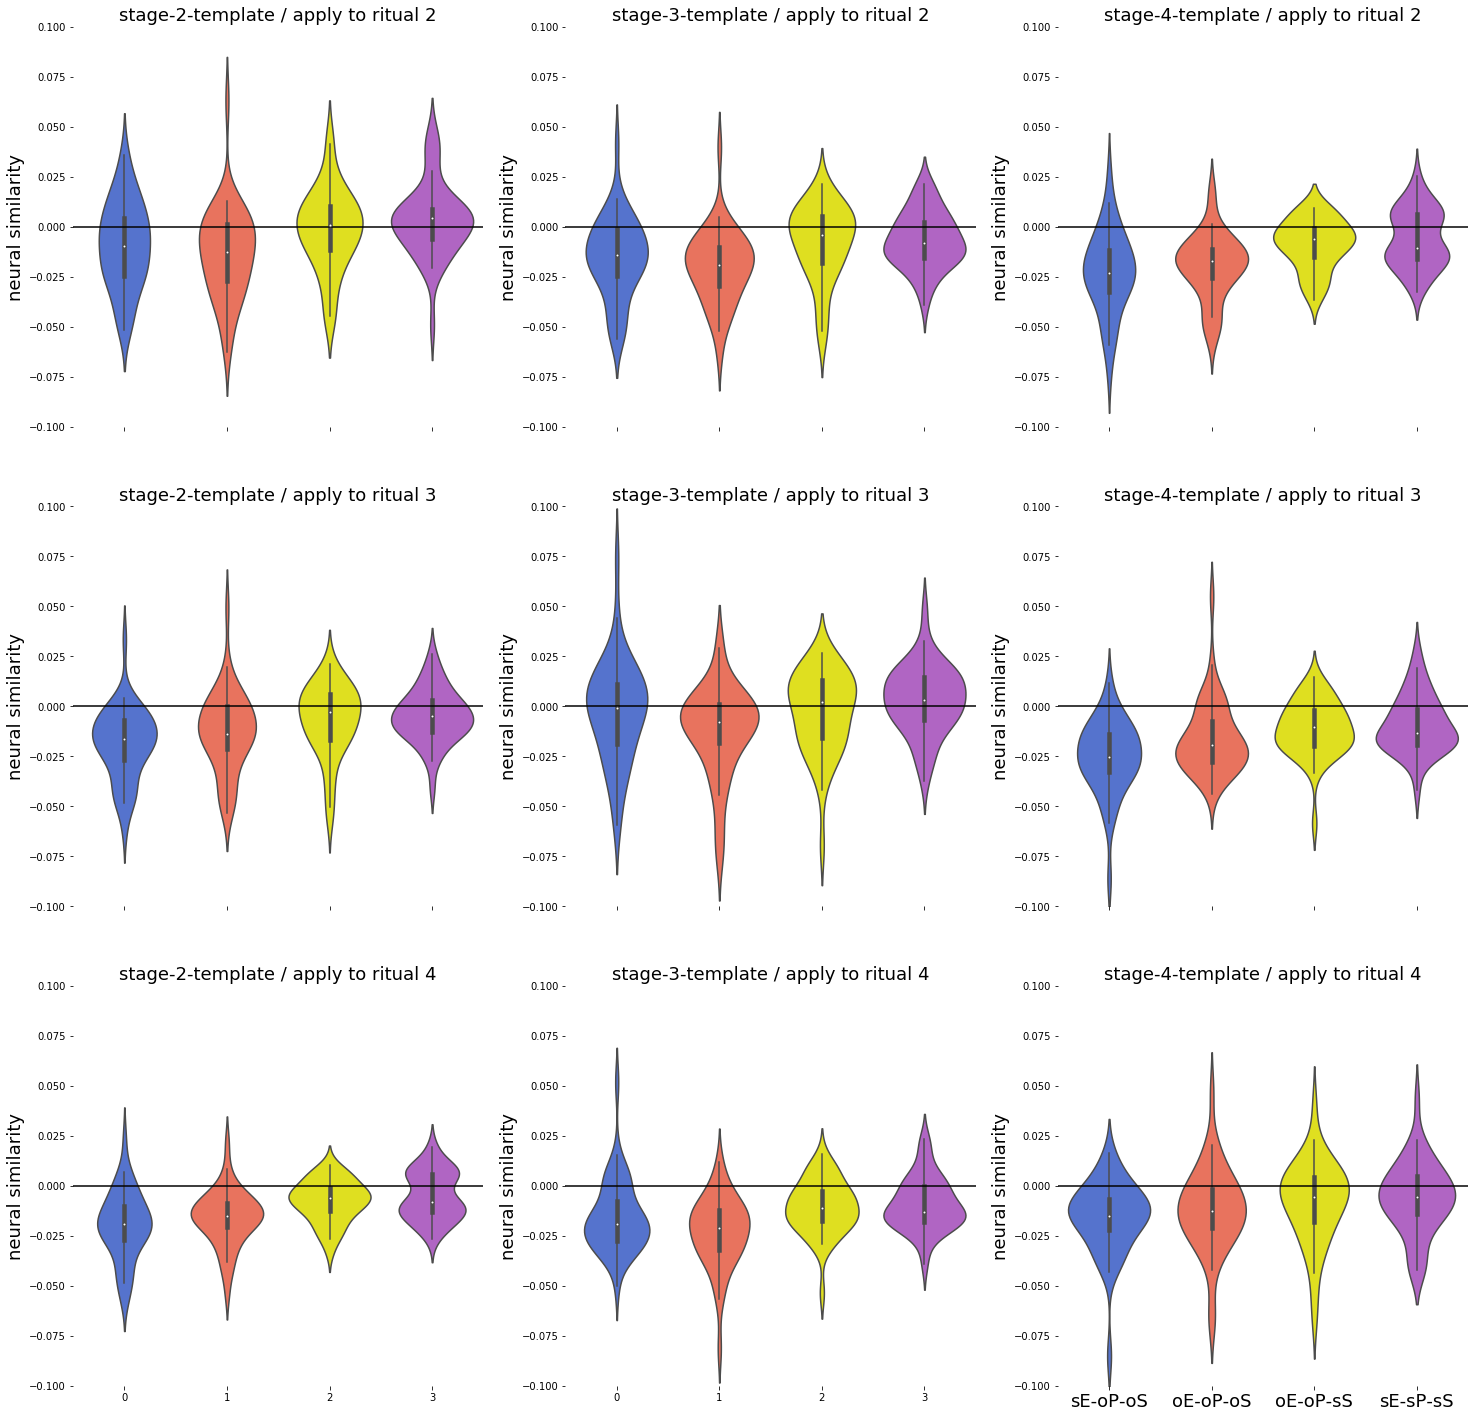

In [11]:
plt.figure(figsize=(25,25))
  
plt.subplot(3,3, 1)
plt.title("stage-2-template / apply to ritual 2", fontsize=18)

set_of_Columns = [sameOtherMean_e2templ_e2.mean(axis=1), 
                  otherOtherMean_e2templ_e2.mean(axis=1),
                  otherSameMean_e2templ_e2.mean(axis=1),
                  sameSameMean_e2templ_e2.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + ROI_name + '_e2templ_e2.csv')

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims) 
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 4)
plt.title("stage-2-template / apply to ritual 3", fontsize=18)

set_of_Columns = [sameOtherMean_e2templ_e3.mean(axis=1), 
                  otherOtherMean_e2templ_e3.mean(axis=1),
                  otherSameMean_e2templ_e3.mean(axis=1),
                  sameSameMean_e2templ_e3.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()

set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + ROI_name + '_e2templ_e3.csv')

seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 7)
plt.title("stage-2-template / apply to ritual 4", fontsize=18)

set_of_Columns = [sameOtherMean_e2templ_e4.mean(axis=1), 
                  otherOtherMean_e2templ_e4.mean(axis=1),
                  otherSameMean_e2templ_e4.mean(axis=1),
                  sameSameMean_e2templ_e4.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)




plt.subplot(3,3, 2)
plt.title("stage-3-template / apply to ritual 2", fontsize=18)

set_of_Columns = [sameOtherMean_e3templ_e2.mean(axis=1), 
                  otherOtherMean_e3templ_e2.mean(axis=1),
                  otherSameMean_e3templ_e2.mean(axis=1),
                  sameSameMean_e3templ_e2.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()

set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + ROI_name + '_e3templ_e2.csv')

seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 5)
plt.title("stage-3-template / apply to ritual 3", fontsize=18)

set_of_Columns = [sameOtherMean_e3templ_e3.mean(axis=1), 
                  otherOtherMean_e3templ_e3.mean(axis=1),
                  otherSameMean_e3templ_e3.mean(axis=1),
                  sameSameMean_e3templ_e3.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()

set_of_Columns2 = set_of_Columns2.rename(columns={0: 'sameOther', 1: 'otherOther', 2: 'otherSame', 3: 'sameSame'})
# set_of_Columns2.to_csv(output_dir + ROI_name + '_e3templ_e3.csv')

seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 8)
plt.title("stage-3-template / apply to ritual 4", fontsize=18)

set_of_Columns = [sameOtherMean_e3templ_e4.mean(axis=1), 
                  otherOtherMean_e3templ_e4.mean(axis=1),
                  otherSameMean_e3templ_e4.mean(axis=1),
                  sameSameMean_e3templ_e4.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)




plt.subplot(3,3, 3)
plt.title("stage-4-template / apply to ritual 2", fontsize=18)

set_of_Columns = [sameOtherMean_e4templ_e2.mean(axis=1), 
                  otherOtherMean_e4templ_e2.mean(axis=1),
                  otherSameMean_e4templ_e2.mean(axis=1),
                  sameSameMean_e4templ_e2.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 6)
plt.title("stage-4-template / apply to ritual 3", fontsize=18)

set_of_Columns = [sameOtherMean_e4templ_e3.mean(axis=1), 
                  otherOtherMean_e4templ_e3.mean(axis=1),
                  otherSameMean_e4templ_e3.mean(axis=1),
                  sameSameMean_e4templ_e3.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)
plt.xticks([0,1,2,3], [" ", 
                       " ", 
                       " ", 
                       " "], fontsize=18)

plt.subplot(3,3, 9)
plt.title("stage-4-template / apply to ritual 4", fontsize=18)

set_of_Columns = [sameOtherMean_e4templ_e4.mean(axis=1), 
                  otherOtherMean_e4templ_e4.mean(axis=1),
                  otherSameMean_e4templ_e4.mean(axis=1),
                  sameSameMean_e4templ_e4.mean(axis=1)]

set_of_Columns2 = pd.DataFrame(set_of_Columns)
set_of_Columns2 = set_of_Columns2.transpose()
seaborn.violinplot(data = set_of_Columns2, palette=["royalblue", "tomato", "yellow", "mediumorchid"])

plt.box(on=None)
plt.axhline(y=0, color='k')
plt.ylim(ylims)
plt.ylabel("neural similarity", fontsize=18)

plt.xticks([0,1,2,3], ["sE-oP-oS", 
                       "oE-oP-oS", 
                       "oE-oP-sS", 
                       "sE-sP-sS"], fontsize=18)

# save output plot as .eps file
#plt.savefig(output_dir + ROI_name + '_violin_appendixFigure.eps')
